In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statistics
from scipy.integrate import solve_ivp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

In [210]:
#I Regression algorithm implementation

#Problem 1
#Part A: Gradient Descent for Mean absolute error

def gradientDescent_Mean(x,y,m,b,l, epochs = 1000):
    err = np.zeros(epochs);                            #initizlize error erray
    for i in range(epochs):
            func = m*x - b                             #f(x) = mx - b Prediction
            dldm = sum(x * (func - y) / abs(func - y)) # Calculate the partial derivative of the loss function w.r.t m
            dldb = sum((-func + y) / abs(func - y)) # Calculate the partial derivative of the loss function w.r.t b
            m = m - l * dldm       # Update m
            b = b - l * dldb                           # Update b
            err[i] = sum(abs(func - y))                # Calculate error
    return m , b ,err

In [211]:
#Part B:
#Gradient descent Least Squared Error

def gradientDescent_Least(x,y,m,b,l, epochs = 1000):
    err = np.zeros(epochs);                            #initizlize error erray
    for i in range(epochs):
            func = m*x - b                             #f(x) = mx - b Prediction
            dldm = (1/2) * sum(abs(func - y)) ** (-1/2) * sum(x * (func - y) / abs(func - y))  # Calculate the partial derivative of the loss function w.r.t m
            dldb = (1/2) * sum(abs(func - y)) ** (-1/2) * sum(x * (-func + y) / abs(func + y))  # Calculate the partial derivative of the loss function w.r.t b
            m = m - l * dldm                           # Update m
            b = b - l * dldb                           # Update b
            err[i] = sum(abs(func - y))**(1/2)         # Calculate error
    return m , b , err

In [212]:
#Problem 2
#part II
#Plot L_1, L_2 errors as a function of number of iterations of your algorithm.

#data
df_1 = pd.read_csv('almost_linear.csv')

#Isolate data, split data TV vs sales
split_1 = df_1.loc[:,'sales'].values.reshape(-1,1) #sales data
split_2 = df_1.loc[:,'TV'].values.reshape(-1,1)    #TV data

#training/data sets
x_train, x_test, y_train, y_test = train_test_split(split_1, split_2, test_size = .2)

#initial guess
m0 = 12
b0 = 5

#learning rate
L = [.002, .001, .0002] #values on graph go crazy higher than .002 for some reason


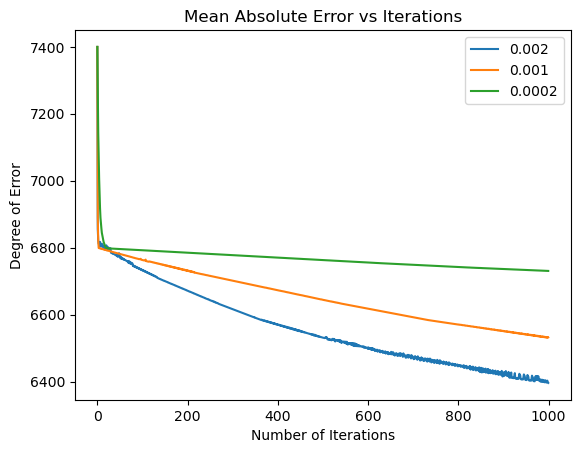

In [213]:
#train data while plotting guesses (gradient descent mean abs)
for i in range (len(L)):
    m1, b1, mean = gradientDescent_Mean(x_train, y_train, m0, b0, L[i], epochs = 1000);
    plt.plot(mean);
plt.title('Mean Absolute Error vs Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Degree of Error')
plt.legend(L);

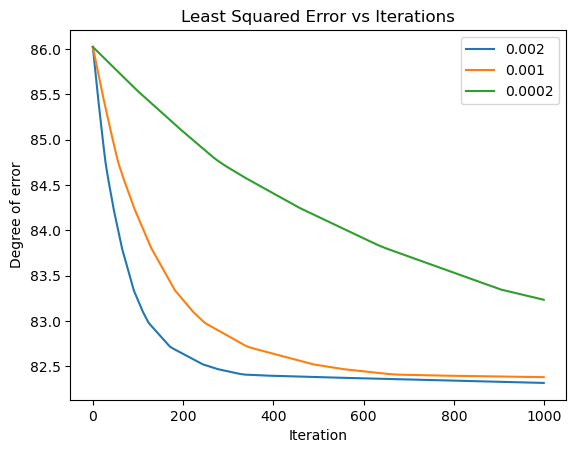

In [214]:
#train data while plotting guesses (gradient descent least squared)
for i in range (len(L)):
    m2, b2, least = gradientDescent_Least(x_train, y_train, m0, b0, L[i], epochs = 1000);
    plt.plot(least);
plt.title('Least Squared Error vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Degree of error')
plt.legend(L);

In [215]:
#State values for m, b and total error for each objective/loss function and learning rate combination.  
print('Mean Absolute Error Variables:')
print('m = ',m1[0])
print('b = ',b1[0])
print('L Values = ', L)
print('Error values: ', mean[-1])

Mean Absolute Error Variables:
m =  10.866879999999634
b =  8.786399999999766
L Values =  [0.002, 0.001, 0.0002]
Error values:  6730.4499200000055


In [216]:
print('Least Squared Error Variables:')
print('m = ',m2[0])
print('b = ',b2[0])
print('L Values = ', L)
print('Error values: ', least[-1])

Least Squared Error Variables:
m =  11.279346105318723
b =  5.2196775840048515
L Values =  [0.002, 0.001, 0.0002]
Error values:  83.23537190324122


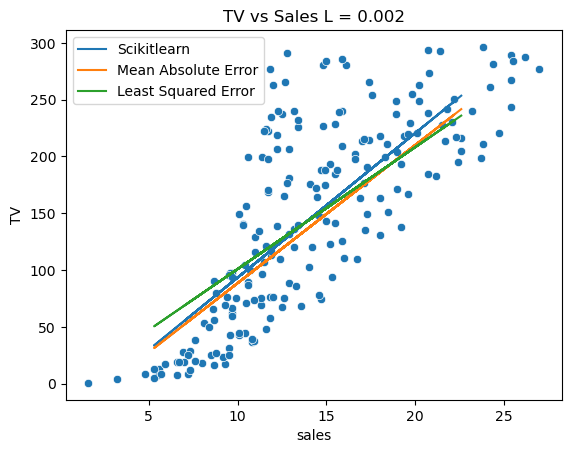

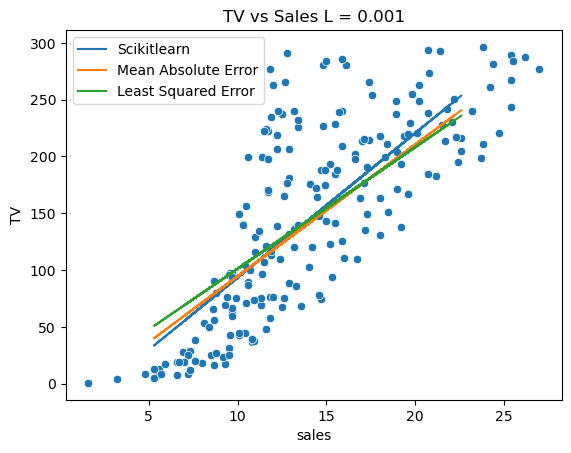

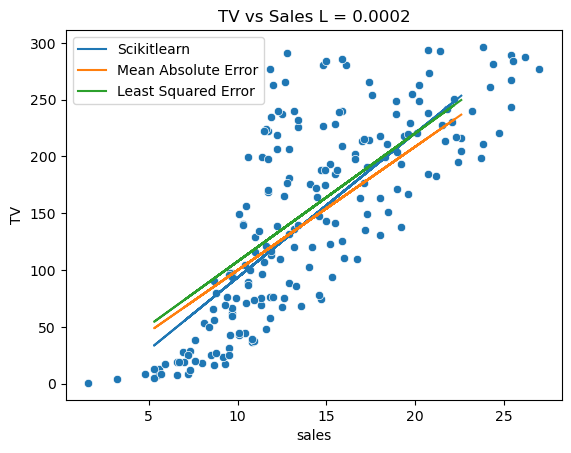

In [217]:
#Problem 3
#Compare your results with a standard linear regression solver 

#create linear regression object
regr = linear_model.LinearRegression()

#Train model
regr.fit(x_train,y_train)

#make prediction
Y_pred = regr.predict(x_test)

for i in range(len(L)):
    #train gradient descent
    m1, b1, _ = gradientDescent_Mean(x_train, y_train, m0, b0, L[i], epochs = 1000);
    m2, b2, _ = gradientDescent_Least(x_train, y_train, m0, b0, L[i], epochs = 1000);
    
    plt.figure()
    sns.scatterplot(data = df_1, x = 'sales', y = 'TV').set(title = f'TV vs Sales L = {L[i]}') 
    plt.plot(x_test,Y_pred, label = 'Scikitlearn')
    
    plt.plot(x_test,m1[0]*x_test - b1[0], label = 'Mean Absolute Error')
    
    plt.plot(x_test,m2[0]*x_test - b2[0], label = 'Least Squared Error')
    plt.legend()

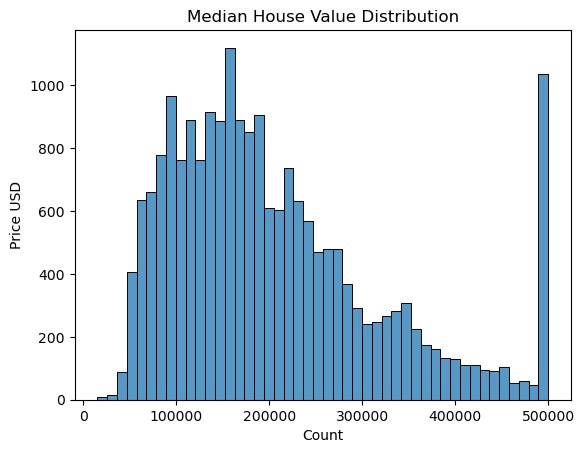

In [218]:
#II Model Selection
#1. Explore the data.  Plot the distribution of median house value.   
#   Plot median house value vs total bedrooms. Plot the correlation matrix.  
#.  Discuss plot results. 

df = pd.read_csv('cal_housing.data')
df.columns = ('longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue')

sns.histplot(data = df, x = 'medianHouseValue').set(title = 'Median House Value Distribution', 
                                                                       xlabel = 'Count', 
                                                                       ylabel = 'Price USD');

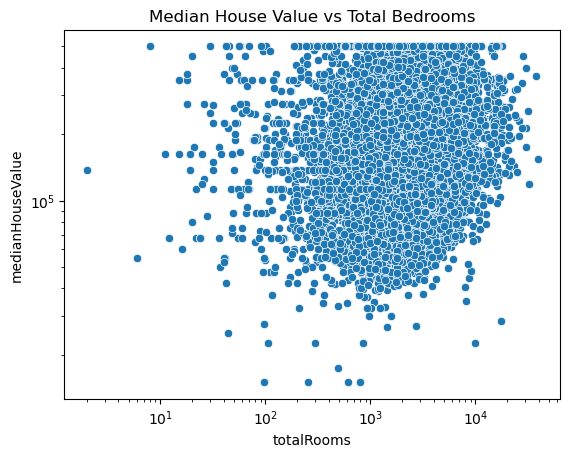

In [219]:
#df
sns.scatterplot(data = df, x = 'totalRooms', y = 'medianHouseValue').set(title = 'Median House Value vs Total Bedrooms');
plt.yscale('log')
plt.xscale('log')

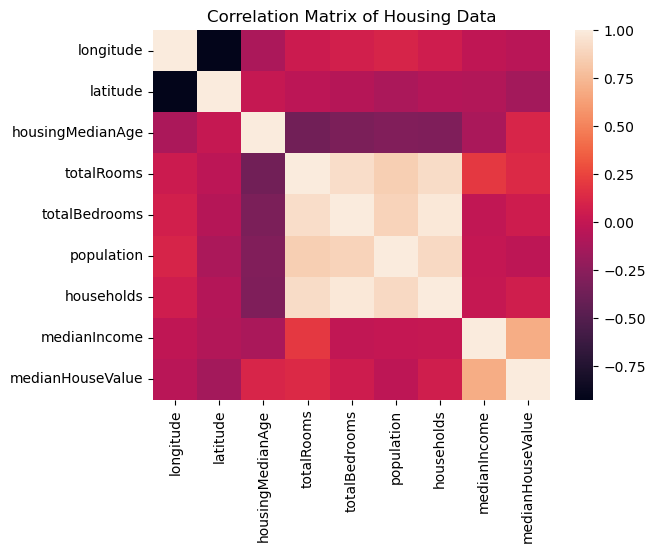

In [220]:
corr = df.corr()
sns.heatmap(corr).set(title = 'Correlation Matrix of Housing Data');

In [221]:
#Question 2
#linear regression models
#lasso
#ridge
#elastic net
import warnings
warnings.filterwarnings('ignore')

#Isolate Data
rooms = df.loc[:, 'totalRooms'].values.reshape(-1,1)
values = df.loc[:, 'medianHouseValue'].values.reshape(-1,1)

#Define parameters
parameters = {'alpha': np.linspace(0,10000,50)}
Lasso = linear_model.Lasso()
Ridge = linear_model.Ridge()
Elastic = linear_model.ElasticNet()

#define gridsearch Lasso
Lasso_Reg = GridSearchCV(Lasso, parameters, scoring = 'neg_root_mean_squared_error', cv = 5, return_train_score = True)
Lasso_Reg.fit(rooms,values)      #fit grid search
print(Lasso_Reg.best_estimator_) #best alpha parameter

#define gridsearch Ridge
Ridge_Reg = GridSearchCV(Ridge, parameters, scoring = 'neg_root_mean_squared_error', cv = 5, return_train_score = True)
Ridge_Reg.fit(rooms,values)      #fit grid search
print(Rid_Reg.best_estimator_) #best alpha parameter

#define gridsearch Elastic
Elastic_Reg = GridSearchCV(Elastic, parameters, scoring = 'neg_root_mean_squared_error', cv = 5, return_train_score = True)
Elastic_Reg.fit(rooms,values)      #fit grid search
print(Elastic_Reg.best_estimator_) #best alpha parameter

Lasso(alpha=10000.0)
Ridge(alpha=10000.0)
ElasticNet(alpha=10000.0)


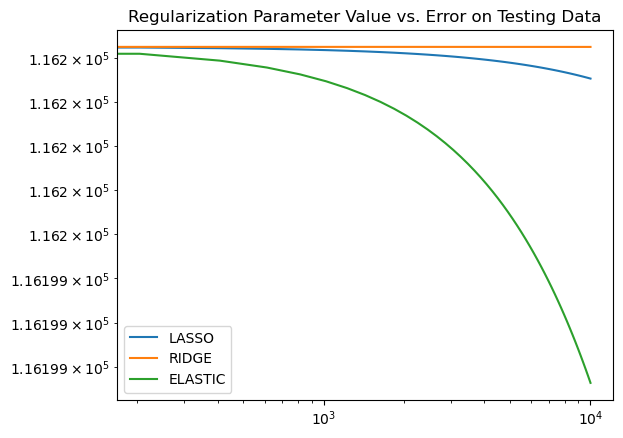

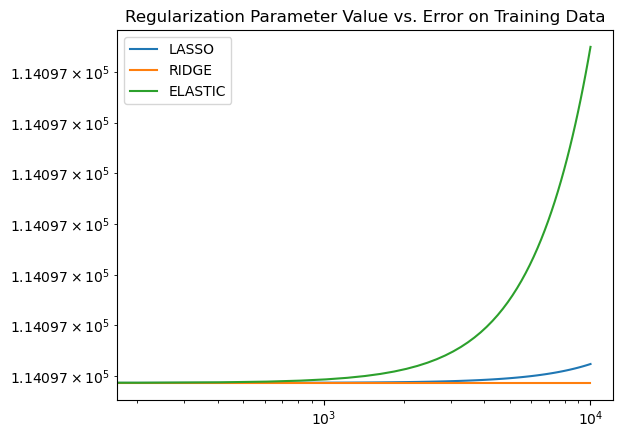

In [222]:
#problem 2 part a
#regularization parameter values vs error on test data
Lasso_meanTest = abs(Lasso_Reg.cv_results_['mean_test_score'])
Ridge_meanTest = abs(Ridge_Reg.cv_results_['mean_test_score'])
Elastic_meanTest = abs(Elastic_Reg.cv_results_['mean_test_score'])

#plotting data
plt.figure()
plt.plot(parameters['alpha'], Lasso_meanTest, label = 'LASSO');
plt.plot(parameters['alpha'], Ridge_meanTest, label = 'RIDGE')
plt.plot(parameters['alpha'], Elastic_meanTest, label = 'ELASTIC')
plt.title('Regularization Parameter Value vs. Error on Testing Data')
plt.legend()
plt.xscale('log')
plt.yscale('log')

#regularization parameter value vs error on training data
Lasso_meanTrain = abs(Lasso_Reg.cv_results_['mean_train_score'])
Ridge_meanTrain = abs(Ridge_Reg.cv_results_['mean_train_score'])
Elastic_meanTrain = abs(Elastic_Reg.cv_results_['mean_train_score'])

#plotting data
plt.figure()
plt.plot(parameters['alpha'], Lasso_meanTrain, label = 'LASSO');
plt.plot(parameters['alpha'], Ridge_meanTrain, label = 'RIDGE');
plt.plot(parameters['alpha'], Elastic_meanTrain, label = 'ELASTIC');
plt.title('Regularization Parameter Value vs. Error on Training Data')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [238]:
#part b
#train data
X_train, X_test, Y_train, Y_test = train_test_split(values, rooms, test_size = 0.2)
#defining  empty lists for coefficients
Lasso_coef = []
Ridge_coef = []
Elastic_coef = []

#Finding regularization parameter value vs predictor coefficient value
for a in parameters['alpha']:
    #LASSO
    Lasso = linear_model.Lasso(alpha = a)
    Lasso.fit(X_train, Y_train)
    Lasso_Y_pred = Lasso.predict(X_test)
    Lasso_coef.append(Lasso.coef_)
    
    #RIDGE
    Ridge = linear_model.Ridge(alpha = a)
    Ridge.fit(X_train, Y_train)
    Ridge_Y_pred = Ridge.predict(X_test)
    Ridge_coef.append(Ridge.coef_)
    
    #Elastic
    Elastic = linear_model.ElasticNet(alpha = a)
    Elastic.fit(X_train, Y_train)
    Elastic_Y_pred = Elastic.predict(X_test)
    Elastic_coef.append(Elastic.coef_)

In [225]:
Ridge_coef[0]

array([[0.00250489]])

In [240]:
Ridge_Y_pred.shape

(4128, 1)

In [241]:
Lasso_Y_pred.shape

(4128,)

In [242]:
Elastic_Y_pred.shape

(4128,)

ValueError: x and y can be no greater than 2D, but have shapes (50,) and (50, 1, 1)

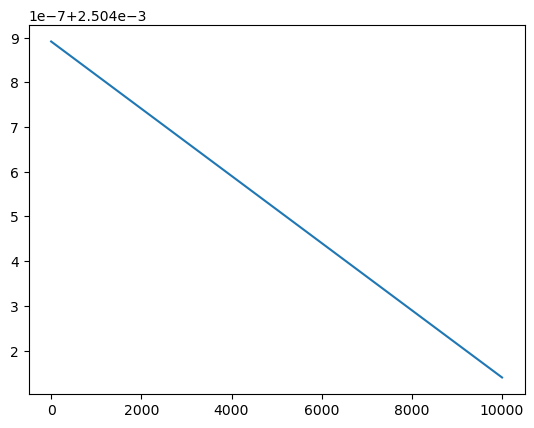

In [224]:
plt.plot(parameters['alpha'],Lasso_coef,label = 'LASSO')
plt.plot(parameters['alpha'],Ridge_coef,label = 'RIDGE')
plt.plot(parameters['alpha'],Elastic_coef,label = 'Elastic')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [ ]:
Lasso_coef[0]

In [ ]:
Ridge_coef[0]

In [ ]:
Elastic_coef[0]